In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #extract the text features using bag of word
from sklearn.naive_bayes import MultinomialNB #naive bayes classifier
from sklearn.model_selection import train_test_split #train set and test set preparation
from sklearn.pipeline import make_pipeline #pipeline
from sklearn.metrics import classification_report #print metrics and error report

In [ ]:
#input dataset: raw text
text = ["Win money now!!!", "Limited time offer!!!", "Congratulations, you won",
    "Exclusive deal just for you", "Get rich quick now", "Free tickets!!!",
    "Hello, how are you?", "Are we meeting tomorrow?", "Let's have lunch today",
    "See you at dinner", "Meeting at 3pm tomorrow", "Don't forget the project",
    "Your invoice is attached", "Schedule the meeting please", "How was your trip?"]

#dataset: labels
labels = ["spam", "spam", "spam", "spam", "spam", "spam", "ham", "ham", "ham", "ham", "ham", "ham", "ham", "ham", "ham"]

In [ ]:
#split train and test sample
x_train, x_test, y_train, y_test = train_test_split(text, labels, test_size=0.3, random_state=42)

In [ ]:
#machine learning pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())
#text feature extraction: bag of words as CountVectorizer
#perform classification using NB naive bayes algorithm

In [ ]:
#train the ML model
model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
#predict on the test sample
y_pred = model.predict(x_test)

In [ ]:
# Evaluation
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         ham       0.75      1.00      0.86         3
        spam       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



**usecase:** classify the new text, new_texts = ["Free tickets now!!!", "See  you at dinner"]

In [ ]:
new_texts = ["Free tickets now!!!", "See you at dinner"]
predictions = model.predict(new_texts)
for txt, pred in zip(new_texts, predictions):
  print(f"{txt} -> {pred}")

Free tickets now!!! -> spam
See you at dinner -> ham


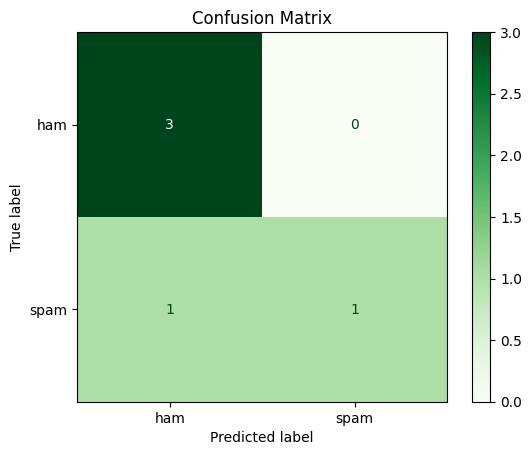

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.show()

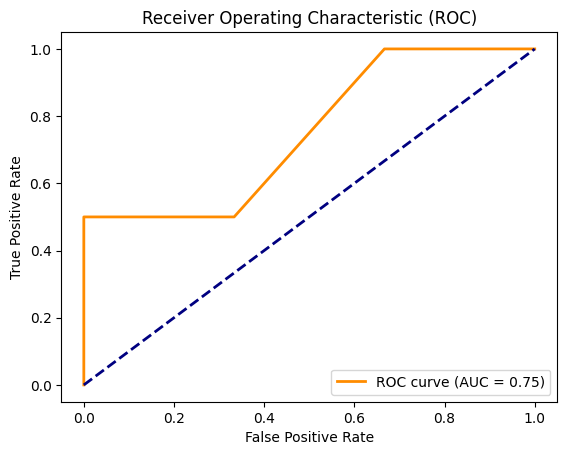

In [ ]:
#ROC curve & AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert labels to binary (ham=0, spam=1)
y_test_bin = label_binarize(y_test, classes=["ham", "spam"]).ravel()
y_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

### after adding extra data inputs and labels

In [ ]:
# Additional Dataset
additional_text_2 = ["Win a prize now!", "Your account is at risk", "Claim your free bonus",
                     "Meeting scheduled for tomorrow", "Project update required", "Invoice #12345 is due",
                     "Limited time offer!", "Exclusive deal for you", "Get started today",
                     "Welcome to our service", "Thank you for your purchase", "Your order has shipped",
                     "Security alert", "Action required", "Important notice",
                     "New message received", "Upcoming event", "Meeting minutes",
                     "Follow up on your inquiry", "Please review this document", "Your feedback requested",
                     "Quick question", "See you soon", "Reminder: Task due",
                     "Final reminder", "Payment received", "Update your profile",
                     "Verify your identity", "Special discount", "Free trial available",
                     "You've won a free gift card!", "Your bank account requires verification", "Claim your limited time offer!",
                     "Meeting confirmation for next week", "Urgent project status update", "Payment reminder for your invoice",
                     "Exclusive access to our new product", "Get your free e-book now", "Start your free trial today",
                     "Welcome to our newsletter", "Thank you for your recent order", "Your package has been delivered",
                     "Security alert: suspicious activity detected", "Action required: verify your account", "Important security update",
                     ]
additional_labels_2 = ["spam", "spam", "spam", "ham", "ham", "ham", "spam", "spam", "ham", "ham", "ham", "ham", "spam", "spam", "ham", "ham", "ham", "ham",
                       "ham", "ham", "ham", "ham", "ham", "ham", "ham", "ham", "ham","spam", "spam", "spam","spam", "spam", "spam",
                       "ham", "ham", "ham","spam", "spam", "spam","ham", "ham", "ham","spam", "spam", "ham",]

In [ ]:
# Combine the original dataset with additional_dataset_2
combined_text = text + additional_text_2
combined_labels = labels + additional_labels_2

In [ ]:
# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_text, combined_labels, test_size=0.3, random_state=42)

In [ ]:
# Retrain the model using the combined training data
model_combined = make_pipeline(CountVectorizer(), MultinomialNB())
model_combined.fit(X_train_combined, y_train_combined)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Predict on the combined test sample
y_pred_combined = model_combined.predict(X_test_combined)

In [ ]:
# Evaluate the model performance on the combined test set
print("Classification Report (Combined Dataset)")
print(classification_report(y_test_combined, y_pred_combined))

Classification Report (Combined Dataset)
              precision    recall  f1-score   support

         ham       1.00      0.90      0.95        10
        spam       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



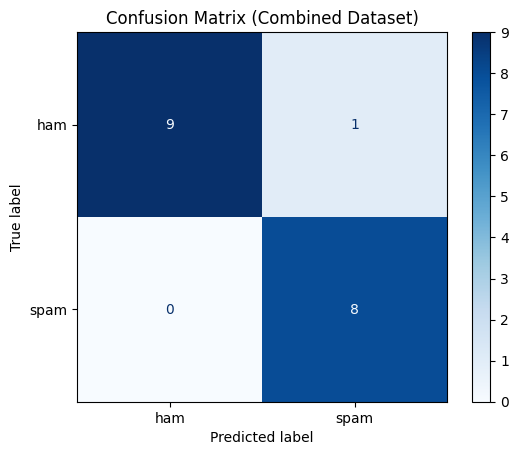

In [ ]:
# Confusion Matrix for Combined Dataset
cm_combined = confusion_matrix(y_test_combined, y_pred_combined, labels=["ham", "spam"])
disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=["ham", "spam"])
disp_combined.plot(cmap="Blues")
plt.title("Confusion Matrix (Combined Dataset)")
plt.show()

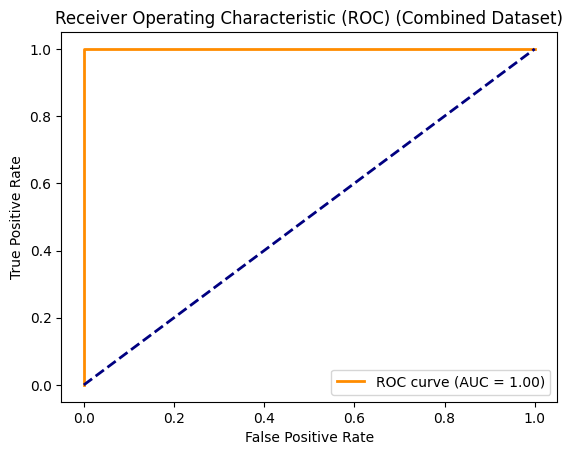

In [104]:
# ROC Curve for Combined Dataset
y_test_combined_bin = label_binarize(y_test_combined, classes=["ham", "spam"]).ravel()
y_proba_combined = model_combined.predict_proba(X_test_combined)[:, 1]

fpr_combined, tpr_combined, _ = roc_curve(y_test_combined_bin, y_proba_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

plt.figure()
plt.plot(fpr_combined, tpr_combined, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc_combined:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) (Combined Dataset)")
plt.legend(loc="lower right")
plt.show()